# Set-up Environment

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

# Load in the Data

In [3]:
data = pd.read_csv('average hours per day.csv')
print(data.shape)
data.head()

(5335821, 2)


,registered_user_id,avg_per_active_day
0,c577d167-5d63-4377-9e6f-0f3495def9a7,0.499768
1,522fae95-adbb-455a-9d46-c72e9c1ef07a,1.479032
2,958a1483-2dc2-46fa-9d92-cee596fcfde3,2.311618
3,25486ab2-324d-4085-ac40-1101e50a0a8d,2.216504
4,4e8d1228-58f7-48ff-b6eb-c8bbff1b65d2,0.987455


In [11]:
data.head()

,avg_per_active_day
registered_user_id,
c577d167-5d63-4377-9e6f-0f3495def9a7,0.499768
522fae95-adbb-455a-9d46-c72e9c1ef07a,1.479032
958a1483-2dc2-46fa-9d92-cee596fcfde3,2.311618
25486ab2-324d-4085-ac40-1101e50a0a8d,2.216504
4e8d1228-58f7-48ff-b6eb-c8bbff1b65d2,0.987455


In [12]:
data.max()

avg_per_active_day    395672.89067
dtype: float64

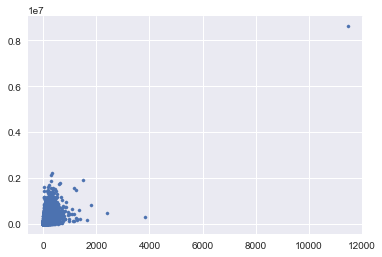

In [30]:
plt.scatter(data['stream_requests'], data['stream_playing_time_combined'], s=10);

In [13]:
data = data.loc[data.avg_per_active_day.values < 24]
data.head()

,avg_per_active_day
registered_user_id,
c577d167-5d63-4377-9e6f-0f3495def9a7,0.499768
522fae95-adbb-455a-9d46-c72e9c1ef07a,1.479032
958a1483-2dc2-46fa-9d92-cee596fcfde3,2.311618
25486ab2-324d-4085-ac40-1101e50a0a8d,2.216504
4e8d1228-58f7-48ff-b6eb-c8bbff1b65d2,0.987455


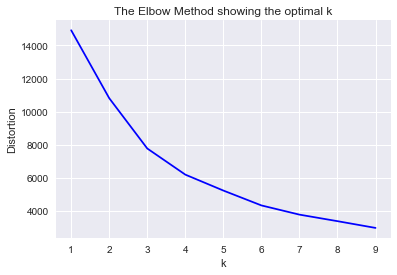

In [32]:
# clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data2)
    kmeanModel.fit(data2)
    distortions.append(sum(np.min(cdist(data2, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data2.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

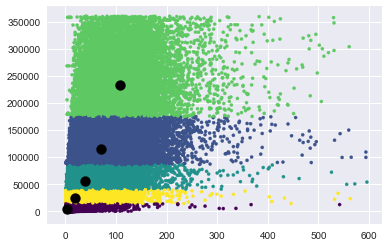

In [71]:
plt.scatter(data2['stream_requests'], data2['stream_playing_time_combined'], c=y_kmeans, s=10, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100)

In [72]:
y_kmeans

array([0, 0, 2, ..., 0, 4, 0])

In [16]:
data['Cluster'] = y_kmeans
##data['id']=data.registered_user_id
data.head()

,avg_per_active_day,Cluster
registered_user_id,,
c577d167-5d63-4377-9e6f-0f3495def9a7,0.499768,4
522fae95-adbb-455a-9d46-c72e9c1ef07a,1.479032,3
958a1483-2dc2-46fa-9d92-cee596fcfde3,2.311618,3
25486ab2-324d-4085-ac40-1101e50a0a8d,2.216504,3
4e8d1228-58f7-48ff-b6eb-c8bbff1b65d2,0.987455,1


In [20]:
data.groupby('Cluster').avg_per_active_day.max()

Cluster
0     0.454948
1     1.430403
2    23.724419
3     2.572018
4     0.891827
Name: avg_per_active_day, dtype: float64

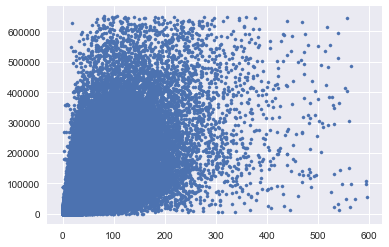

In [42]:
plt.scatter(data2['stream_requests'], data2['stream_playing_time_combined'], s=10);

In [48]:
print(data2.shape)

(3144897, 2)
